In [1]:
!sudo apt-get update
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,372 kB]
Ign:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,162 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,200 kB]
Get:13 http://archive.ubuntu.com/ubu

In [2]:
from google.colab import drive
drive.mount("/content/drive")
import os
path="/content/drive/My Drive/CnOCR-master/docs/examples"
os.chdir(path)
os.listdir(path)


Mounted at /content/drive


['captcha.jpg',
 'huochepiao.jpeg',
 'helloworld.jpg',
 'chn-00199981.jpg',
 'train_config.json',
 'en_book1.jpeg',
 '00199975.jpg',
 '00010994.jpg',
 'fanti.jpg',
 '00199980.jpg',
 '20457890_2399557098.jpg',
 '00010991.jpg',
 'multi-line_en_black.png',
 'chn-00199985.jpg',
 '00199971.jpg',
 '00010965.jpg',
 '00199985.jpg',
 'hybrid.png',
 'rand_cn1.png',
 'chn-00199980.jpg',
 '00199978.jpg',
 'rand_cn2.png',
 'captcha1.png',
 'train_config_gpu.json',
 '00199979.jpg',
 'shupai.png',
 'multi-line_cn1.png',
 'multi-line_cn2.png',
 'chn-00199989.jpg',
 'taobao4.jpg',
 'multi-line_en_white.png',
 'chn-00199984.jpg']

In [3]:
import cv2
import pytesseract

img = cv2.imread('./huochepiao.jpeg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'K051971\nBl =e nesno Bo Be\nth ap 1s MFUIVU SL mr aa\nNanfeng — Nanchang\n2018% 045 198 10:514 07 #1285\n¥55.07 bel iT — SF E\nBeate 4 A 4K\n3258 5 mmm i a\n| SEE 212306 KH Plon306 | a\n33496311930420K 05197] HES\n\x0c'

In [4]:
import cv2
import numpy as np

img = cv2.imread('./huochepiao.jpeg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)


In [5]:
image = cv2.imread('./huochepiao.jpeg')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [6]:
# this is only for google colab, the original is cv2.imshow()
from google.colab.patches import cv2_imshow

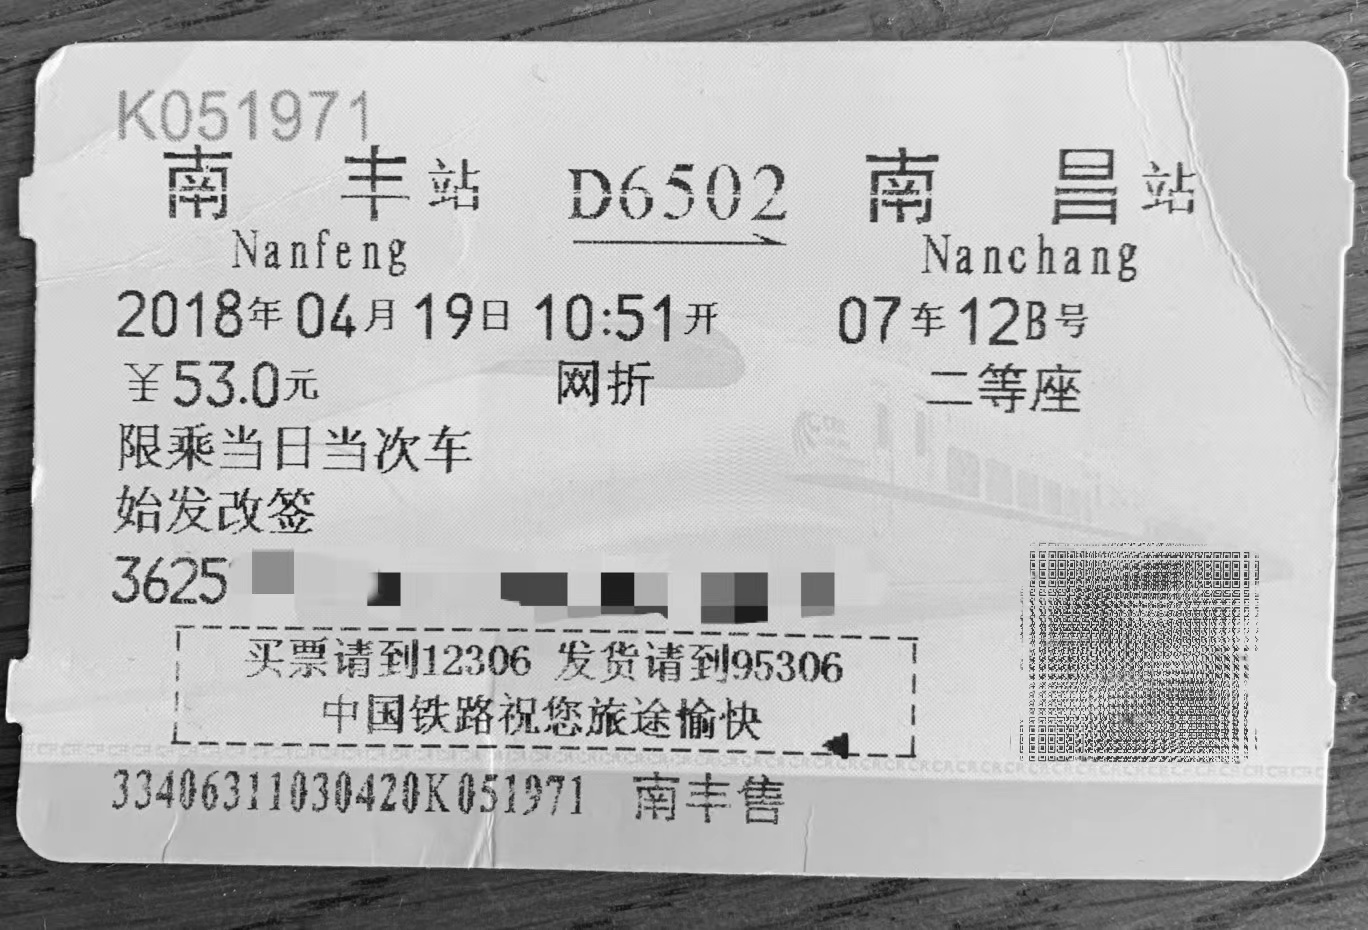

'K05197 1\nBl =e nesno Be Be\nmr Speers SFP NS g. mr aa :\nNanfeng — Nanchang\n2018% 044 198 10:514 07 £1234\n¥ 53.0% Rx HT — 6 Be\nBese 4 ASK\ni |\n| SEE 2N12306 KH Plo5306 | a\nLR BameeHm |\n33496311030420K 051971 HEB\n/ }\n\x0c'

In [7]:
img = gray
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

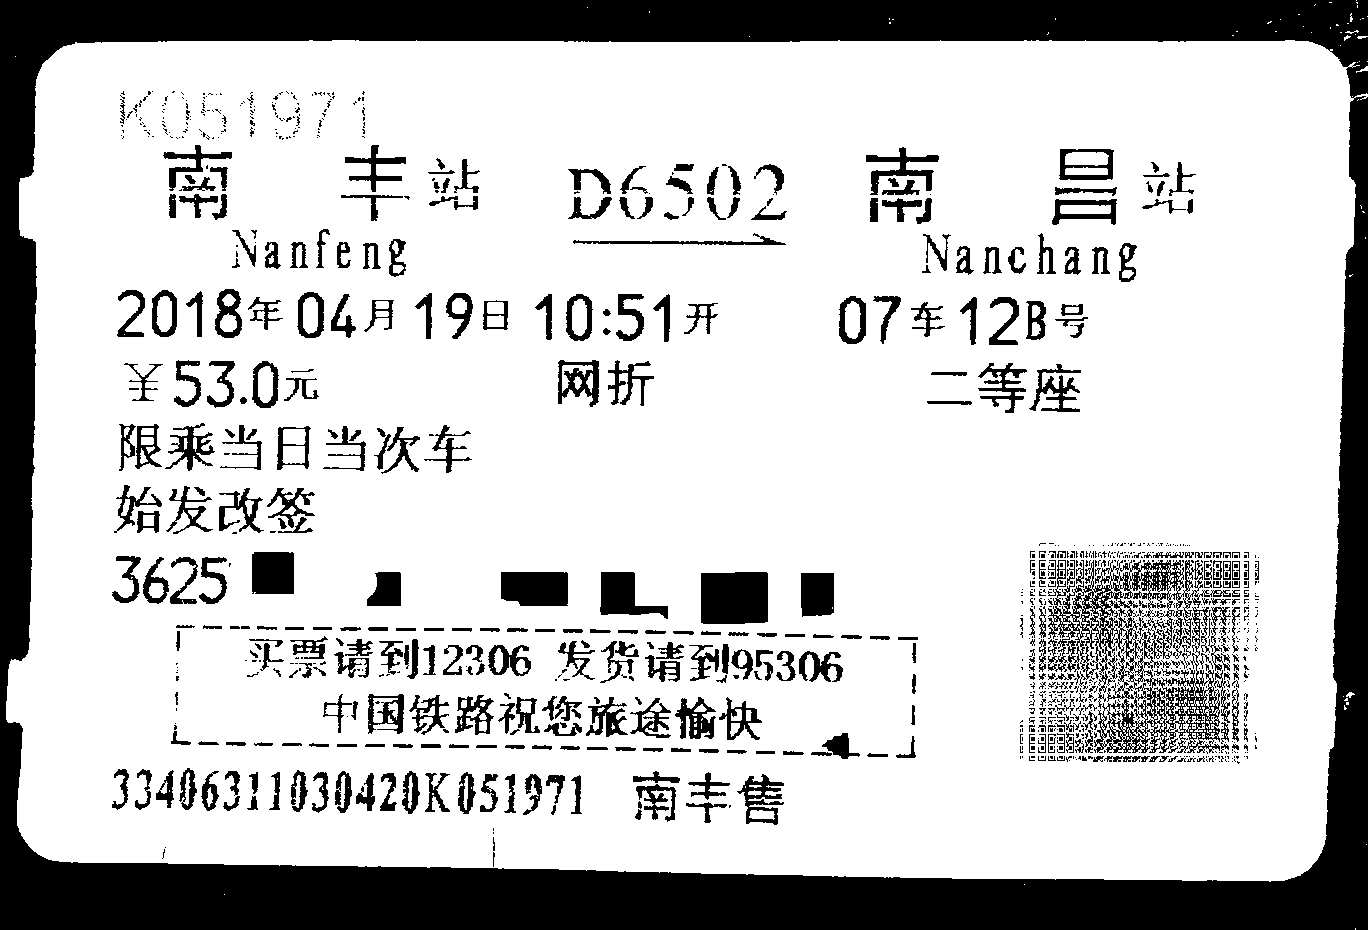

'mos ae\nBe Fe nesno BG Bee\nrr TO aH MII ri aq ;\nNanfeng OO Nanchang :\n2018% 045 198 10:514 07 #1235\n¥ 53.0% be fr — 35 RE\nPSE A SK\na A |\n| SSW 812306 SH Plon306 | a\nMS Ce |\n33466311030420K051971 HEB\nf |\n\x0c'

In [8]:
img = thresh
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

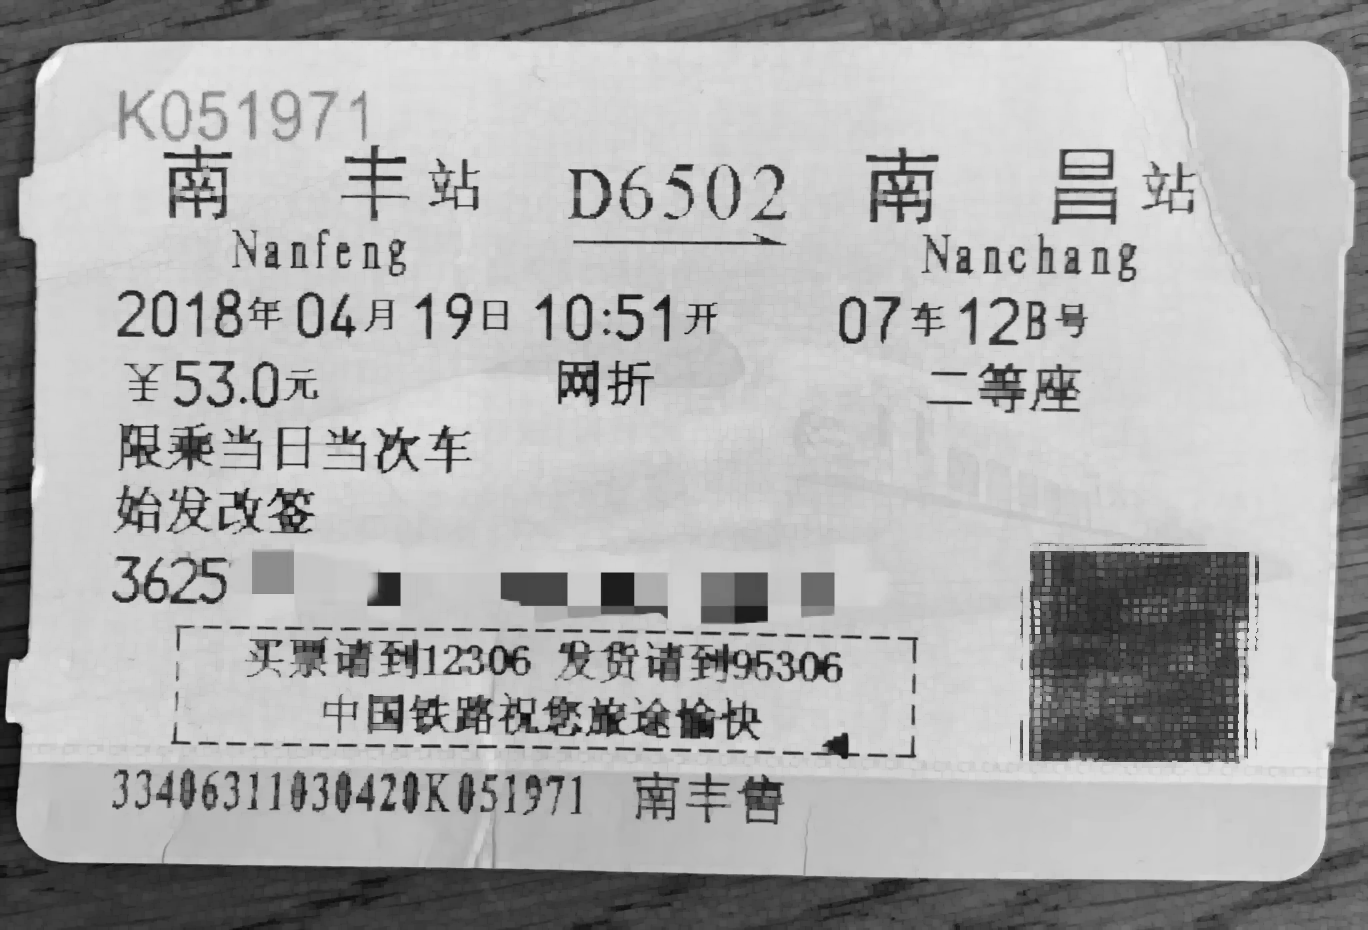

'K05197 1\nPoo 34 6502 BH Bt\nNanfeng aan Nanchang\n2018% 045 198 10:514 07* 123848\n¥53.0% bd ST — 3\nRe ate A 4 ke\nWARNE -\n| SE GH12306 BSW Mo5306 ;\n|___ RRRaet |\n33406311030420K051971 BE +e\n\x0c'

In [9]:
mg = opening
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

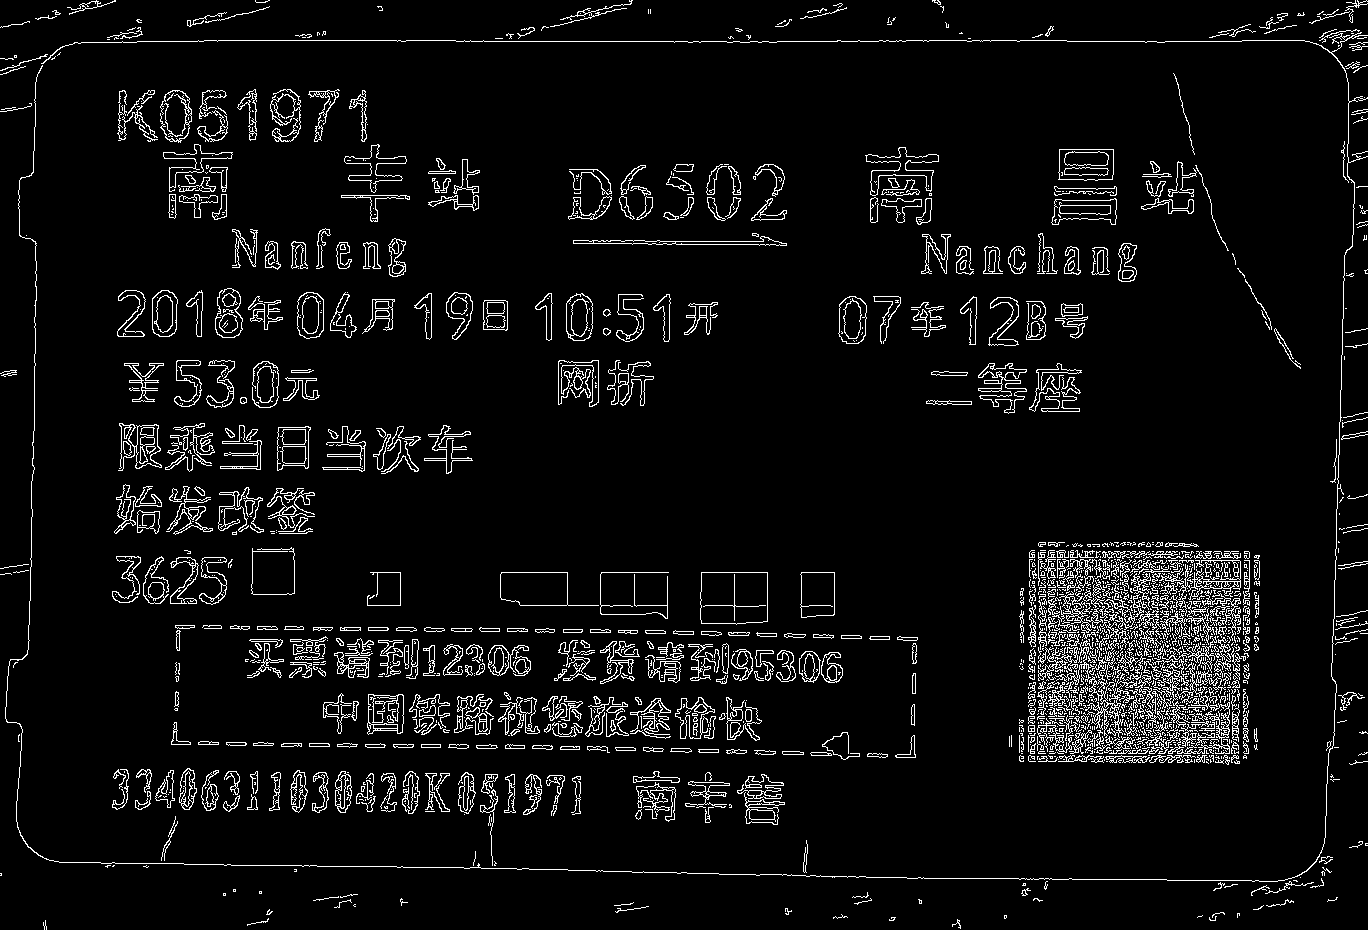

'eT we anaes\nSO at ye an\n: 5 a : = ry ¢ = a i?\n\nA 3h 6502 A BB\nEen abe Ens eta a\nAL) eet eo. ae\n\n“| ¥53.0% air TSE :\neae ee ir\nGR ae ee\n\n: -_ [ae\nee )6)6)le\n\nme pews fp ee i 7\nee en |)’\ni daaiaiaiaiec ed Ea |\n\n_ . ma _ ae\n\x0c'

In [10]:
img = canny
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

In [11]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('./huochepiao.jpeg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [12]:
import cv2
import pytesseract

img = cv2.imread('./huochepiao.jpeg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

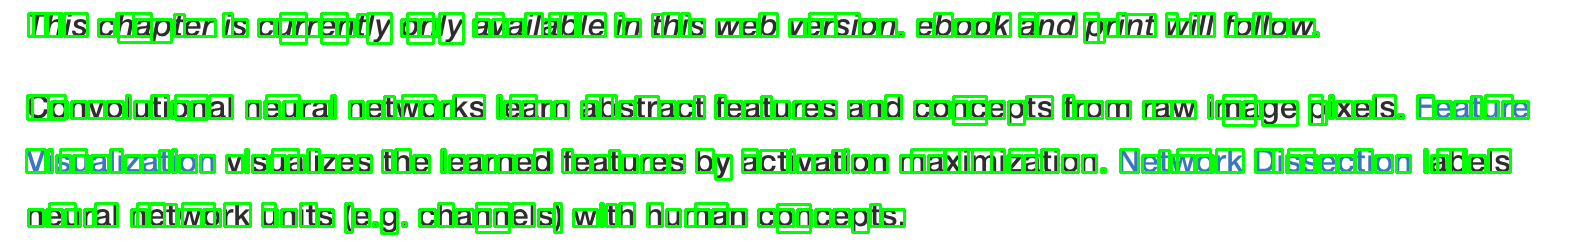

-1

In [13]:

import cv2
import pytesseract

img = cv2.imread('./multi-line_en_white.png')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

In [17]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('./huochepiao.jpeg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(img, config=custom_config))


051971

-1
201804519810514 071285
55.07
44
32585

212306-5306
33496311930420051971



In [19]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'KOS/\n\nBl =e nesno Bo Be\nth ap is MFUIVU SL mr aa\nNanfeng — Nanchang\n\ni%O  O:% O/#BS\n\n¥S. bel iT — SF E\n\nBeate AK\n\nse s mmm i a\n| SEE # KH Plone | a\n\n/dZKOSI]] HES\n\x0c'

In [20]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [21]:
custom_config = r'-l eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'K051971\nBl =e nesno Bo Be\nth ap 1s MFUIVU SL mr aa\nNanfeng — Nanchang\n2018% 045 198 10:514 07 #1285\n¥55.07 bel iT — SF E\nBeate 4 A 4K\n3258 5 mmm i a\n| SEE 212306 KH Plon306 | a\n33496311930420K 05197] HES\n\x0c'

In [22]:
!sudo apt-get install tesseract-ocr-grc
!sudo apt-get install tesseract-ocr-tha

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-grc
0 upgraded, 1 newly installed, 0 to remove and 52 not upgraded.
Need to get 916 kB of archives.
After this operation, 2,261 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-grc all 1:4.00~git30-7274cfa-1.1 [916 kB]
Fetched 916 kB in 0s (3,153 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-grc.
(Reading data

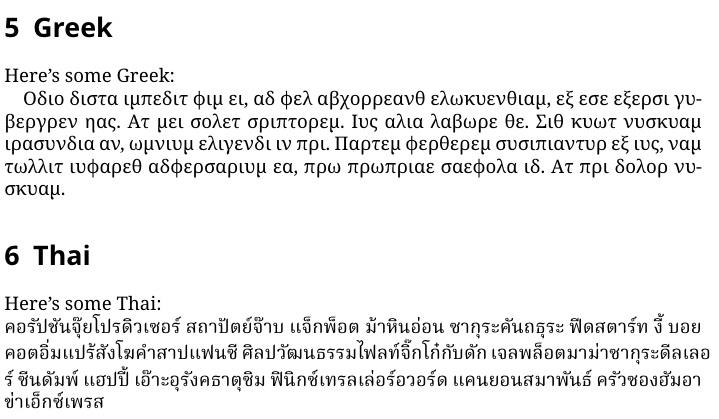

'5 Greek\nHere’s some Greek:\n\nΟδιο διστα ιμπεδιτ φιμ ει, αδ φελ αβχορρεανθ ελωκυενθιαμ, εξ εσε εξερσι γυ-\nβεργρεν ηας. Ατ μει σολετ σριπτορεμ. ἴυς αλια λαβωρε θε. Σιθ κυωτ νυσκυαμ\nτρασυνδια αν, ὠμνιυμ ελιγενδι τιν πρι. Παρτεμ φερθερεμ συσιπιαντὺυρ εξ ιυς,ναμ\n%0790 แ ร เง ๑ ๕ 80 ๕ 6 ๑ อ 06 ส 0 เง น อ ๓ , πρω πρωπριαε σαεφολα ιδ. Ατ πρι δολορ νυ-\nσκυαμ.\n\n6 Thai\n\nHere’s some Thai: ν᾿\n\nค อ ร ั ป ซั น จ ุ ้ ย โป ร ด ิ ว เซ อ ร ์ ส ถา ป ั ต ย ์ จ ๊ า บ แจ ็ ก พ ็ อ ต ม ้ า ห ิ น อ ่ อ น ซา ก ุ ร ะ ค ั น ถ ธ ุ ร ะ ฟิ ด ส ต า ร ์ ท ง ี ้ บ อ ย\nค อ ต อ ื ่ ม แป ร ั ส ั ง โฆ ค ํ า ส า ป แฟ น ซี ศิ ล ป ว ั ฒ น ธร ร ม ไฟ ล ท ์ จ ิ ๊ ก โก ๋ ก ั บ ด ั ก เจ ล พ ล ็ อ ต ม า ม ่ า ซา ก ุ ร ะ ด ี ล เล อ\nร ์ ซี น ด ั ม พ ์ แฮ ป ป ี ้ เอ ๊ ้ า ะ อ ุ ร ั ง ค ธา ต ุ ซิ ม ฟิ น ิ ก ซ์ เท ร ล เล ่ อ ร ์ อ ว อ ร ์ ด แค น ย อ น ส ม า พ ั น ธ์ ค ร ั ว ซอ ง ฮั ม อ า\nข่ า เอ ็ ก ซ์ เพ ร ส\n\x0c'

In [23]:
img = cv2.imread('greek-thai.png')
cv2_imshow(img)
# Adding custom options
custom_config = r'-l grc+tha+eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

In [24]:
!pip -q install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [25]:
custom_config = r'-l grc+tha+eng --psm 6'
txt = pytesseract.image_to_string(img, config=custom_config)

from langdetect import detect_langs
detect_langs(txt)

[th:0.8571422941810581, el:0.1428577056232566]

In [26]:
def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU Threshold
  ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()



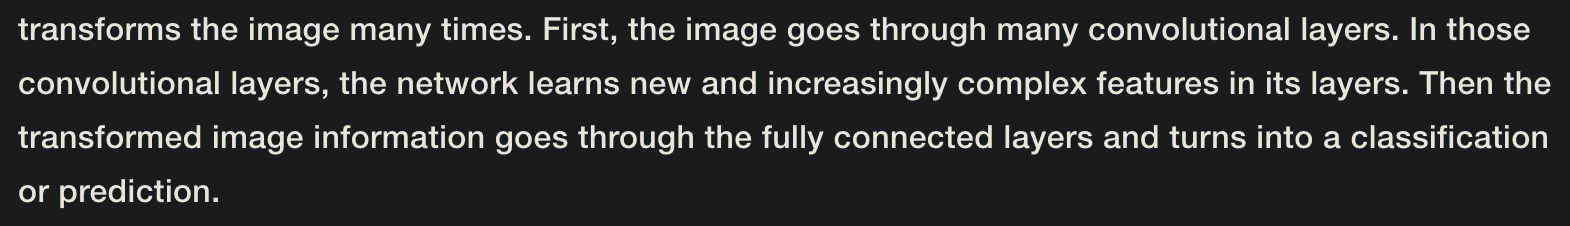



or prediction.

transformed image information goes through the fully connected layers and turns into a classification

convolutional layers, the network learns new and increasingly complex features in its layers. Then the

transforms the image many times. First, the image goes through many convolutional layers. In those



In [27]:
image = cv2.imread("multi-line_en_black.png")
read_text_from_image(image)

# OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()